In [26]:
import torch,torchaudio,matplotlib.pyplot as plt,numpy as np,libnum
from scipy.signal import hilbert ,savgol_filter
wav,cyl = torchaudio.load('flag.mp3')
fw = wav[0]
hit = savgol_filter(np.abs(hilbert(fw.numpy())),500,1)
splitlist=[0]
hi = (hit[1:] - hit[:-1] )
i =0
while i < len(fw):
    if  len(np.where(hi[i-100:i]>=0)[0]) >80 and fw[i]>0.1 and (hit[i] -  hit[i-100]) / hit[i] >0.1:
        splitlist.append(i)
        i=int(i+cyl*0.1)
    i+=1
flag=''
for i in range(1,len(splitlist)-1):
    fft=torch.abs(torch.fft.fft(fw[splitlist[i]: splitlist[i+1]]))[:(splitlist[i+1]-splitlist[i])//2]
    maxs = torch.where(fft==fft.max())[0][0]//2
    if fft[maxs*5] < fft[maxs*4]:
        flag+='0'
    else :
        flag+='1'
print(libnum.b2s(flag))


b'ctfshow{f47986c4-d0ec-433c-915e-4f84a8d17453}ctfshow{f47986c4-d0e'


44100

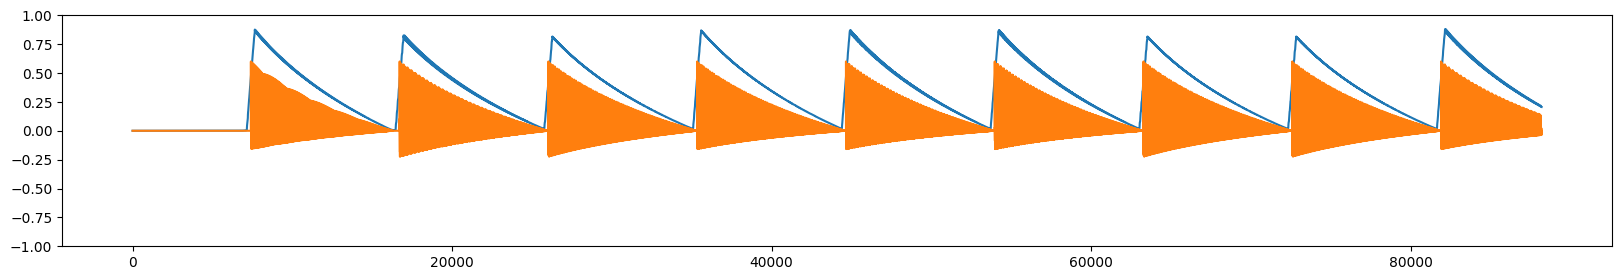

In [7]:
plt.figure(figsize=(20,3))
plt.ylim(-1,1)
plt.plot(hit[cyl*3:cyl*5] / hit.max()) 
plt.plot(fw[cyl*3:cyl*5]  ) 
cyl

In [19]:
flag

''

In [20]:
for i in splitlist:
    wav[0][i] = 1.5 
torchaudio.save('ff.wav',wav,cyl)

0


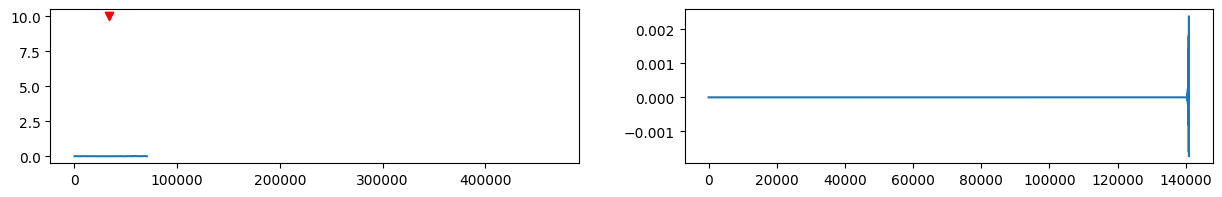

1


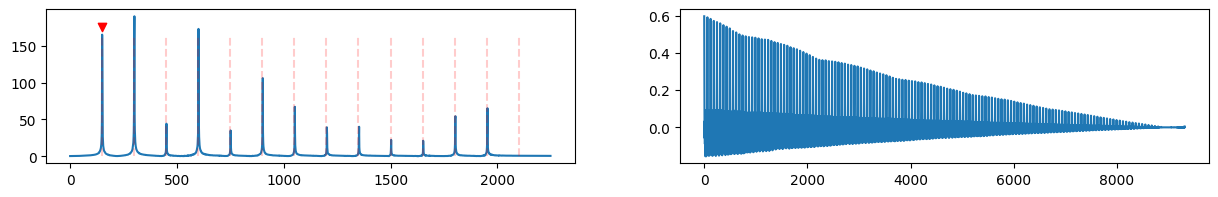

2


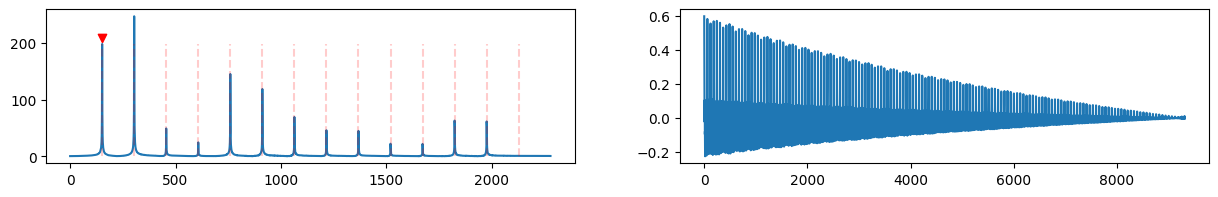

3


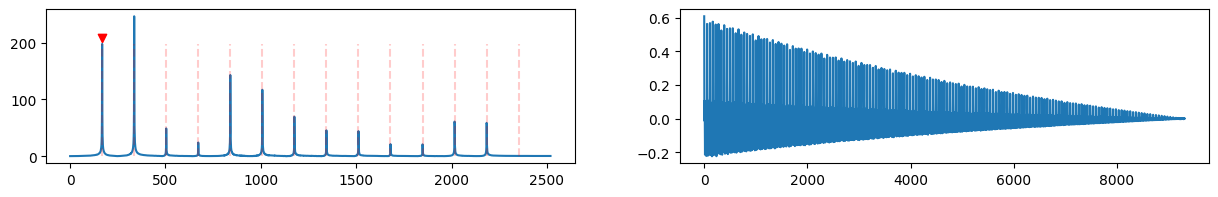

4


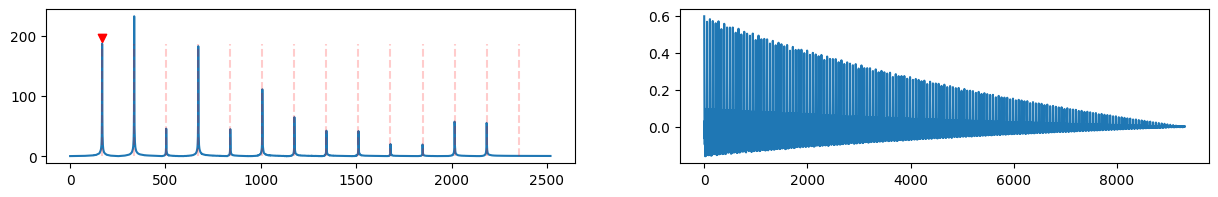

5


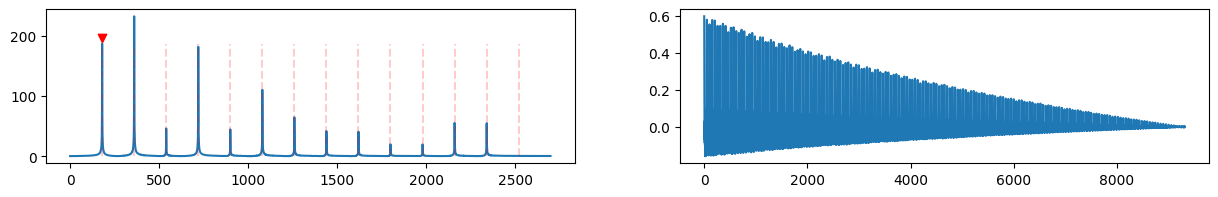

6


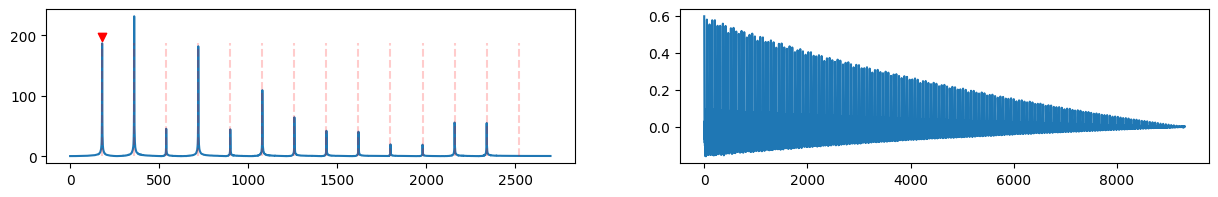

7


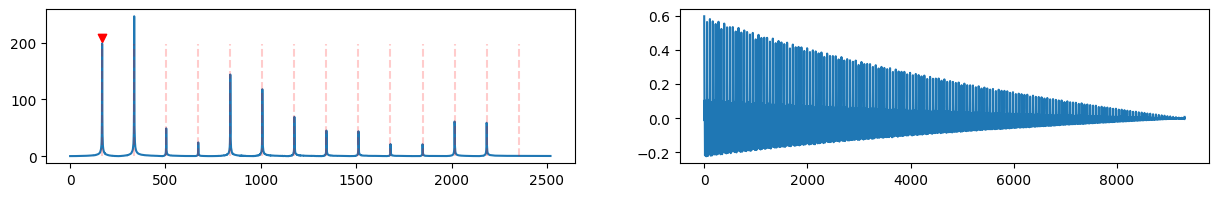

8


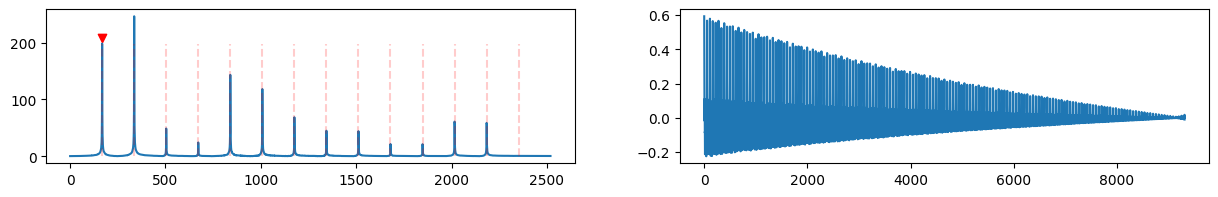

9


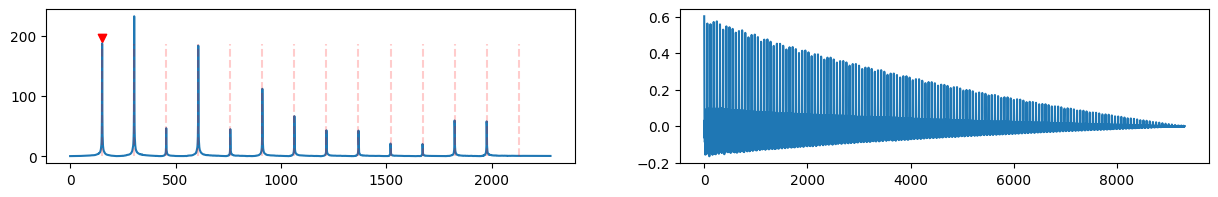

In [20]:
stop = len(splitlist)-1
for i in range(0,10):
    print(i)
    fft=torch.abs(torch.fft.fft(fw[splitlist[i]: splitlist[i+1]]))[:(splitlist[i+1]-splitlist[i])//2]
    maxs = torch.where(fft==fft.max())[0][0]//2
    plt.figure(figsize=(15,2))
    plt.subplot(121)
    plt.plot(fft[:maxs*15])
    plt.scatter(maxs, fft[maxs]+10,c='r',marker='v')
    for x in range(1,15):
        plt.vlines(maxs*x, 0, fft[maxs] ,alpha=0.2,linestyles='dashed' ,colors='r') 
    plt.subplot(122)
    plt.plot(fw[splitlist[i]: splitlist[i+1]])
    plt.show()



b'ctfshow{f47986c4-d0ec-433c-915e-4f84a8d17453}ctfshow{f47986c4-d0e'


In [ ]:
'011000110111010001100110011100110110100001101111101111011110111110110110011000111110100000011101111110011111100111100111100000000000001101100110001100110100001011010011001000011000000110010101100011001011111111110100110100001100110011001110110001100101101001111110011110011100000110011011011011100101000000000010110010011010001100011000111000001101000111111111100001001110000110010000110001100110111001101000011010100110011101111110101100011011101000110000110011111100111110111101000011110111101111111111101110111101101100110001101000001101110011100100111000001101100110000000000011001101000010110101100100000000000011000001100101'
'011000110111010001100110011100110110100001101111111101110111101101100110001101000011011100111001001110000011011001100011001101000010110101100100001100000110010101100011001011010011010000110011001100110110001100101101001110010011000100110101011001010010110100110100011001100011100000110100011000010011100001100100001100010011011100110100001101010011001101111101'